<a href="https://colab.research.google.com/github/Mingyang0816/Home-Advantage-in-EPL/blob/main/Home_Advantage_in_EPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import squarify
from math import pi
pd.options.mode.chained_assignment = None

# Data Scraping

In [ ]:
# Retrieve data from webpage
df = pd.read_html('https://fbref.com/en/comps/9/2022-2023/schedule/2022-2023-Premier-League-Scores-and-Fixtures')

In [ ]:
# Scrape all columns of dataset
for idx,table in enumerate(df):
 print("***************************")
 print(idx)
 print(table)

original_df = df[0]

***************************
0
       Wk  Day        Date   Time            Home   xG Score  xG.1  \
0     1.0  Fri  2022-08-05  20:00  Crystal Palace  1.2   0–2   1.0   
1     1.0  Sat  2022-08-06  12:30          Fulham  1.2   2–2   1.2   
2     1.0  Sat  2022-08-06  15:00       Tottenham  1.5   4–1   0.5   
3     1.0  Sat  2022-08-06  15:00   Newcastle Utd  1.7   2–0   0.3   
4     1.0  Sat  2022-08-06  15:00    Leeds United  0.8   2–1   1.3   
..    ...  ...         ...    ...             ...  ...   ...   ...   
425  38.0  Sun  2023-05-28  16:30         Everton  1.0   1–0   0.5   
426  38.0  Sun  2023-05-28  16:30  Leicester City  1.4   2–1   1.4   
427  38.0  Sun  2023-05-28  16:30     Aston Villa  2.8   2–1   1.4   
428  38.0  Sun  2023-05-28  16:30    Leeds United  1.5   1–4   2.2   
429  38.0  Sun  2023-05-28  16:30       Brentford  1.3   1–0   1.6   

                Away  Attendance                        Venue         Referee  \
0            Arsenal     25286.0                

In [ ]:
original_df.head(5)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2022-08-05,20:00,Crystal Palace,1.2,0–2,1.0,Arsenal,25286.0,Selhurst Park,Anthony Taylor,Match Report,NaN
1,1.0,Sat,2022-08-06,12:30,Fulham,1.2,2–2,1.2,Liverpool,22207.0,Craven Cottage,Andy Madley,Match Report,NaN
2,1.0,Sat,2022-08-06,15:00,Tottenham,1.5,4–1,0.5,Southampton,61732.0,Tottenham Hotspur Stadium,Andre Marriner,Match Report,NaN
3,1.0,Sat,2022-08-06,15:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,52245.0,St James' Park,Simon Hooper,Match Report,NaN
4,1.0,Sat,2022-08-06,15:00,Leeds United,0.8,2–1,1.3,Wolves,36347.0,Elland Road,Robert Jones,Match Report,NaN


# Data Cleaning

In [ ]:
# Remove unnecessary columns
pl_df = original_df.drop(["Referee", "Match Report", "Notes"], axis = 1)

In [ ]:
# Remove rows
pl_df = pl_df.dropna(axis = 0, how = "all").reset_index(drop = True)

In [ ]:
# Rename columns
pl_df = pl_df.rename(columns={"xG": "HomeXG", "xG.1": "AwayXG"})
pl_df.head(15)

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Attendance,Venue
0,1.0,Fri,2022-08-05,20:00,Crystal Palace,1.2,0–2,1.0,Arsenal,25286.0,Selhurst Park
1,1.0,Sat,2022-08-06,12:30,Fulham,1.2,2–2,1.2,Liverpool,22207.0,Craven Cottage
2,1.0,Sat,2022-08-06,15:00,Tottenham,1.5,4–1,0.5,Southampton,61732.0,Tottenham Hotspur Stadium
3,1.0,Sat,2022-08-06,15:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,52245.0,St James' Park
4,1.0,Sat,2022-08-06,15:00,Leeds United,0.8,2–1,1.3,Wolves,36347.0,Elland Road
5,1.0,Sat,2022-08-06,15:00,Bournemouth,0.6,2–0,0.7,Aston Villa,11013.0,Vitality Stadium
6,1.0,Sat,2022-08-06,17:30,Everton,0.7,0–1,1.5,Chelsea,39254.0,Goodison Park
7,1.0,Sun,2022-08-07,14:00,Leicester City,0.6,2–2,0.8,Brentford,31794.0,King Power Stadium
8,1.0,Sun,2022-08-07,14:00,Manchester Utd,1.4,1–2,1.5,Brighton,73711.0,Old Trafford
9,1.0,Sun,2022-08-07,16:30,West Ham,0.5,0–2,2.2,Manchester City,62443.0,London Stadium


In [ ]:
# Check data types of columns
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wk          380 non-null    float64
 1   Day         380 non-null    object 
 2   Date        380 non-null    object 
 3   Time        380 non-null    object 
 4   Home        380 non-null    object 
 5   HomeXG      380 non-null    float64
 6   Score       380 non-null    object 
 7   AwayXG      380 non-null    float64
 8   Away        380 non-null    object 
 9   Attendance  379 non-null    float64
 10  Venue       380 non-null    object 
dtypes: float64(4), object(7)
memory usage: 32.8+ KB


In [ ]:
# Statistical summary
pl_df.describe()

,Wk,HomeXG,AwayXG,Attendance
count,380.000000,380.000000,380.000000,379.00000
mean,19.500000,1.584211,1.259737,40223.74934
std,10.980313,0.846544,0.718423,16382.80446
min,1.000000,0.000000,0.100000,9972.00000
25%,10.000000,0.900000,0.800000,29401.50000
50%,19.500000,1.500000,1.100000,36955.00000
75%,29.000000,2.100000,1.700000,53284.00000
max,38.000000,5.200000,4.300000,75546.00000


In [ ]:
pl_df.shape

(380, 11)

### Missing Values

In [ ]:
# Check number of missing values
pl_df.isnull().sum()

Wk            0
Day           0
Date          0
Time          0
Home          0
HomeXG        0
Score         0
AwayXG        0
Away          0
Attendance    1
Venue         0
dtype: int64

In [ ]:
# Find row with missing value
pl_df[pl_df["Attendance"].isnull()]

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Attendance,Venue
377,38.0,Sun,2023-05-28,16:30,Aston Villa,2.8,2–1,1.4,Brighton,NaN,Villa Park


In [ ]:
# Replace missing value
pl_df["Attendance"].fillna(42212, inplace = True)

In [ ]:
# Convert attendance column from float to int
pl_df["Attendance"] = pl_df["Attendance"].astype(int)
pl_df.head(5)

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Attendance,Venue
0,1.0,Fri,2022-08-05,20:00,Crystal Palace,1.2,0–2,1.0,Arsenal,25286,Selhurst Park
1,1.0,Sat,2022-08-06,12:30,Fulham,1.2,2–2,1.2,Liverpool,22207,Craven Cottage
2,1.0,Sat,2022-08-06,15:00,Tottenham,1.5,4–1,0.5,Southampton,61732,Tottenham Hotspur Stadium
3,1.0,Sat,2022-08-06,15:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,52245,St James' Park
4,1.0,Sat,2022-08-06,15:00,Leeds United,0.8,2–1,1.3,Wolves,36347,Elland Road


### Supplementary Columns

In [ ]:
# Create new columns for goals scored by home and away teams
pl_df["HomeGoals"] = pl_df["Score"].str.split('–', expand = True)[0]
pl_df["HomeGoals"] = pl_df["HomeGoals"].astype(int)
pl_df["AwayGoals"] = pl_df["Score"].str.split('–', expand = True)[1]
pl_df["AwayGoals"] = pl_df["AwayGoals"].astype(int)

In [ ]:
# Create new columns for points scored for home and away teams
conditions = [
    (pl_df["HomeGoals"] > pl_df["AwayGoals"]),
    (pl_df["HomeGoals"] == pl_df["AwayGoals"]),
    (pl_df["HomeGoals"] < pl_df["AwayGoals"])
]

home_values = [3, 1, 0]
away_values = [0, 1, 3]

pl_df["HomePoints"] = np.select(conditions, home_values)
pl_df["AwayPoints"] = np.select(conditions, away_values)

In [ ]:
# Create new columns for goal difference for home and away teams
pl_df["HomeGD"] = pl_df["HomeGoals"] - pl_df["AwayGoals"]
pl_df["AwayGD"] = pl_df["AwayGoals"] - pl_df["HomeGoals"]

In [ ]:
# Create new columns for expected goal difference for home and away teams
pl_df["HomeXGD"] = pl_df["HomeXG"] - pl_df["AwayXG"]
pl_df["AwayXGD"] = pl_df["AwayXG"] - pl_df["HomeXG"]

In [ ]:
# Create new columns for team rankings
rankings = {"Manchester City": 1, "Arsenal": 2, "Manchester Utd": 3, "Newcastle Utd": 4, "Liverpool": 5,
            "Brighton": 6, "Aston Villa": 7, "Tottenham": 8, "Brentford": 9, "Fulham": 10,
            "Crystal Palace": 11, "Chelsea": 12, "Wolves": 13, "West Ham": 14, "Bournemouth": 15,
            "Nott'ham Forest": 16, "Everton": 17, "Leicester City": 18, "Leeds United": 19, "Southampton": 20}
pl_df["HomeRanking"] = pl_df["Home"].map(rankings)
pl_df["AwayRanking"] = pl_df["Away"].map(rankings)
pl_df.head(15)

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Attendance,Venue,HomeGoals,AwayGoals,HomePoints,AwayPoints,HomeGD,AwayGD,HomeXGD,AwayXGD,HomeRanking,AwayRanking
0,1.0,Fri,2022-08-05,20:00,Crystal Palace,1.2,0–2,1.0,Arsenal,25286,Selhurst Park,0,2,0,3,-2,2,0.2,-0.2,11,2
1,1.0,Sat,2022-08-06,12:30,Fulham,1.2,2–2,1.2,Liverpool,22207,Craven Cottage,2,2,1,1,0,0,0.0,0.0,10,5
2,1.0,Sat,2022-08-06,15:00,Tottenham,1.5,4–1,0.5,Southampton,61732,Tottenham Hotspur Stadium,4,1,3,0,3,-3,1.0,-1.0,8,20
3,1.0,Sat,2022-08-06,15:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,52245,St James' Park,2,0,3,0,2,-2,1.4,-1.4,4,16
4,1.0,Sat,2022-08-06,15:00,Leeds United,0.8,2–1,1.3,Wolves,36347,Elland Road,2,1,3,0,1,-1,-0.5,0.5,19,13
5,1.0,Sat,2022-08-06,15:00,Bournemouth,0.6,2–0,0.7,Aston Villa,11013,Vitality Stadium,2,0,3,0,2,-2,-0.1,0.1,15,7
6,1.0,Sat,2022-08-06,17:30,Everton,0.7,0–1,1.5,Chelsea,39254,Goodison Park,0,1,0,3,-1,1,-0.8,0.8,17,12
7,1.0,Sun,2022-08-07,14:00,Leicester City,0.6,2–2,0.8,Brentford,31794,King Power Stadium,2,2,1,1,0,0,-0.2,0.2,18,9
8,1.0,Sun,2022-08-07,14:00,Manchester Utd,1.4,1–2,1.5,Brighton,73711,Old Trafford,1,2,0,3,-1,1,-0.1,0.1,3,6
9,1.0,Sun,2022-08-07,16:30,West Ham,0.5,0–2,2.2,Manchester City,62443,London Stadium,0,2,0,3,-2,2,-1.7,1.7,14,1


# Two-Sample T-test

In [ ]:
# Calculate total home points for each team
home_points_df = pl_df.groupby(["Home"])["HomePoints"].sum().reset_index(name = "Total Home Points")
home_points_df = home_points_df.rename(columns={'Home': 'Team'})

In [ ]:
# Calculate total away points for each team
away_points_df = pl_df.groupby(["Away"])["AwayPoints"].sum().reset_index(name = "Total Away Points")
away_points_df = away_points_df.rename(columns={'Away': 'Team'})

In [ ]:
# Merge home_points_df and away_points_df
team_points_df = pd.merge(home_points_df, away_points_df, how = "left", on = ["Team"])
team_points_df.head()

,Team,Total Home Points,Total Away Points
0,Arsenal,45,39
1,Aston Villa,38,23
2,Bournemouth,22,17
3,Brentford,37,22
4,Brighton,34,28


In [ ]:
# Run two-sample T-test
stats.ttest_ind(team_points_df["Total Home Points"], team_points_df["Total Away Points"], alternative = "greater")

TtestResult(statistic=3.66056831502296, pvalue=0.0003810006903611666, df=38.0)

# Data Visualization

### Home vs Away for each Team

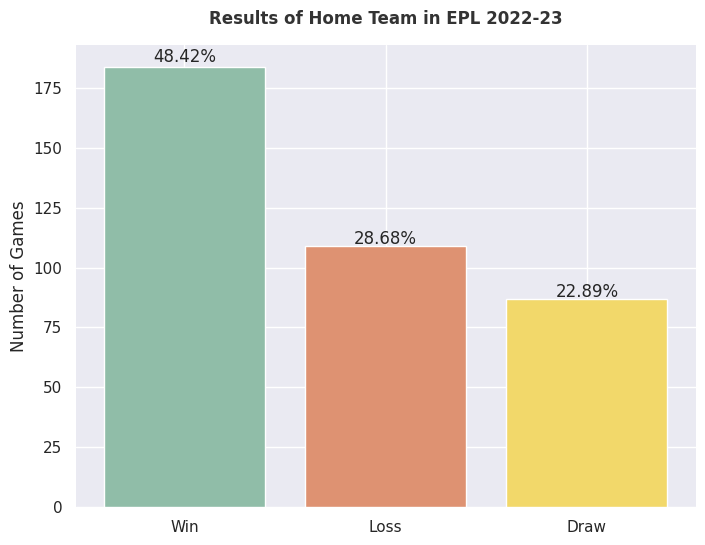

In [ ]:
# Create dataframe for results of home team
home_results = pl_df["HomePoints"].value_counts().rename_axis("Result").reset_index(name = "Count")
result_dict = {3: "Win", 1: "Draw", 0: "Loss"}
home_results = home_results.replace({"Result": result_dict})
home_results["Percentage"] = home_results["Count"] / sum(home_results["Count"]) * 100
home_results["Percentage"] = home_results["Percentage"].round(2)

# Bar plot of results of home team
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True, axis='y', zorder = 0)

my_color = ["#90bda8", "#de9272", "#f2d86a"]
home_results_plot = ax.bar(home_results["Result"], home_results["Count"], color = my_color, zorder = 10)
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.ylabel("Number of Games")
plt.title("Results of Home Team in EPL 2022-23", pad = 15, color = "#333333", weight = "bold")

# Remove figure borders and ticks
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.tick_params(left = False, bottom = False)

# Include percentage above bar plot
i = 0
for n in home_results_plot:
    width = n.get_width()
    height = n.get_height()
    x, y = n.get_xy()
    plt.text(x + width / 2, y + height * 1.01, str(home_results.Percentage[i]) + "%", ha = 'center')
    i += 1

plt.show()

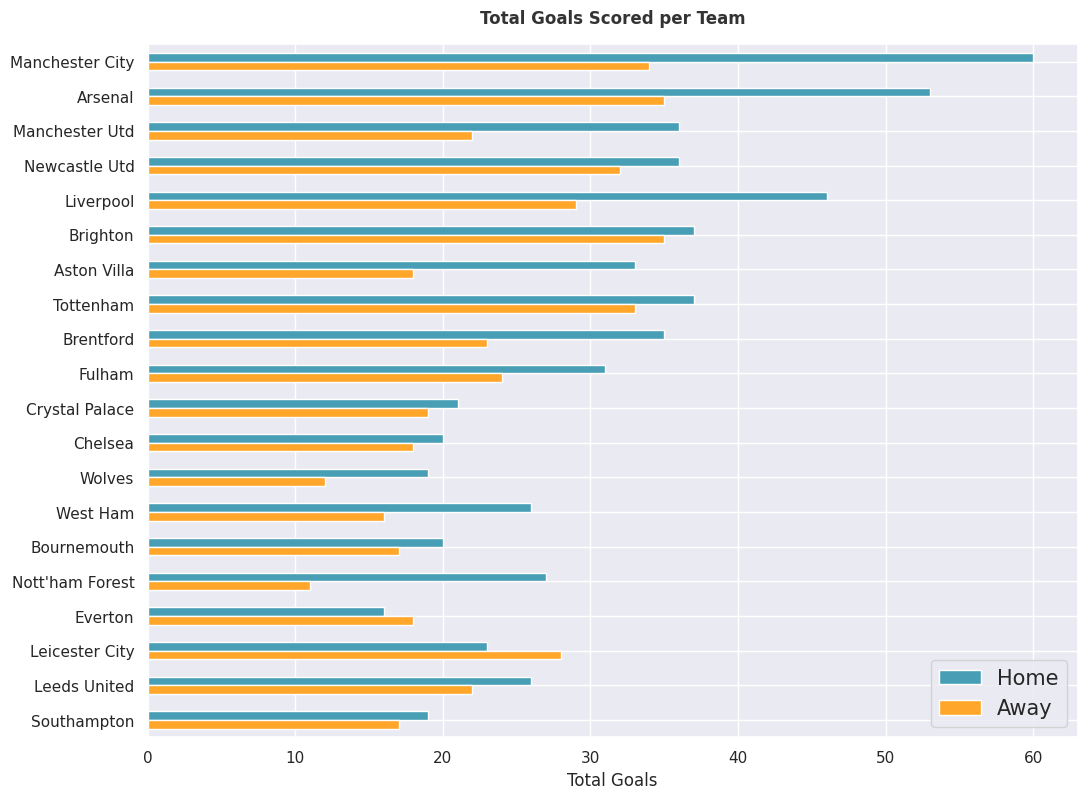

In [ ]:
# Create dataframe for home and away goals scored by each team
goals_by_home = pl_df.groupby("Home")["HomeGoals"].sum()
goals_by_away = pl_df.groupby("Away")["AwayGoals"].sum()
goals_by_team = pd.concat([goals_by_home, goals_by_away], axis = 1)

# Change index to team column
goals_by_team.reset_index(inplace=True)
goals_by_team = goals_by_team.rename(columns = {"index": "Team"})

# Add team ranking column
goals_by_team["Ranking"] = goals_by_team["Team"].map(rankings)
goals_by_team = goals_by_team.sort_values(by = ["Ranking"])

# Bar plot of goals scored by each team home and away
my_color = ["#489fb5", "#ffa62b"]
goals_plot = goals_by_team.plot(x = "Team", y = ["HomeGoals", "AwayGoals"], kind = 'barh', color = my_color, zorder = 1, figsize = (12, 9))
goals_plot.set(ylabel = None)
goals_plot.grid(True, axis='x', zorder = 0)
plt.gca().invert_yaxis()
plt.tick_params(left = False, bottom = False)
plt.xlabel("Total Goals")
plt.legend(labels = ["Home", "Away"], fontsize = 15)
plt.title("Total Goals Scored per Team", pad = 15, color = "#333333", weight = "bold")
plt.show()

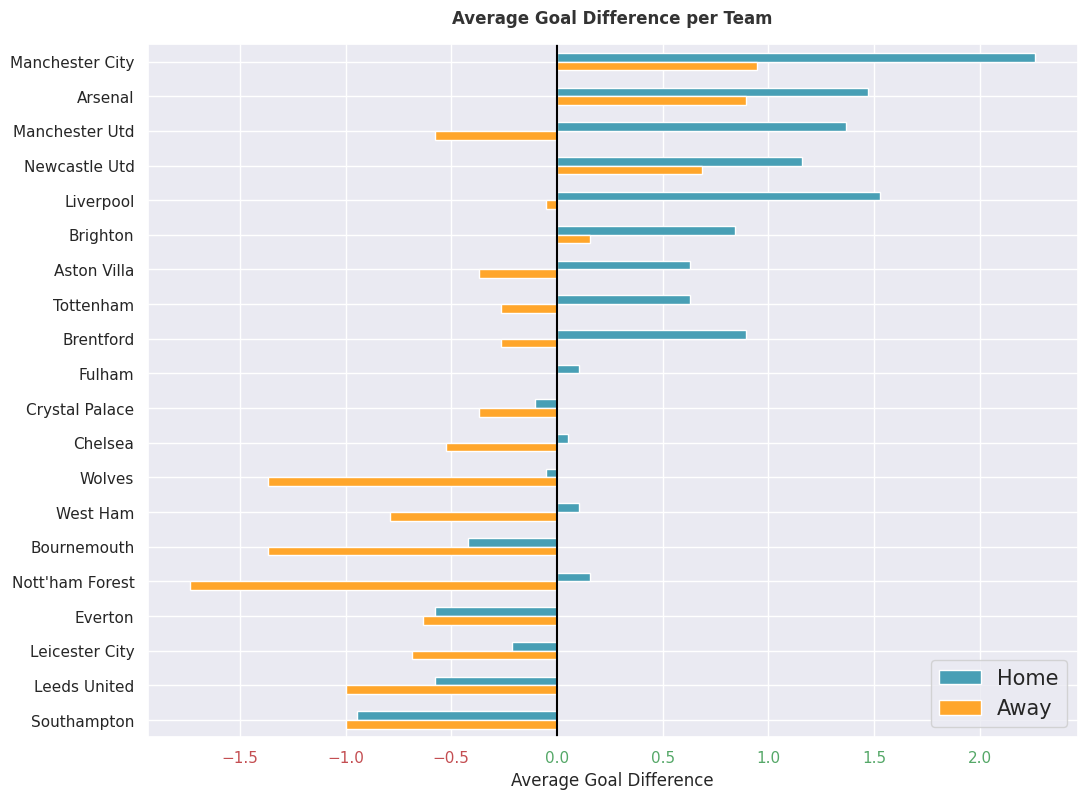

In [ ]:
# Create dataframe for home and away average goal difference for each team
gd_by_home = pl_df.groupby("Home")["HomeGD"].mean()
gd_by_away = pl_df.groupby("Away")["AwayGD"].mean()
gd_by_team = pd.concat([gd_by_home, gd_by_away], axis = 1)

# Change index to team column
gd_by_team.reset_index(inplace=True)
gd_by_team = gd_by_team.rename(columns = {"index": "Team"})

# Add team ranking column
gd_by_team["Ranking"] = gd_by_team["Team"].map(rankings)
gd_by_team = gd_by_team.sort_values(by = ["Ranking"])

# Bar plot of average goal difference of each team home and away
my_color = ["#489fb5", "#ffa62b"]
gd_plot = gd_by_team.plot(x = "Team", y = ["HomeGD", "AwayGD"], kind = 'barh', color = my_color, zorder = 1, figsize = (12, 9))
gd_plot.set(ylabel = None)
gd_plot.grid(True, axis='x', zorder = 0)
plt.gca().invert_yaxis()
plt.tick_params(left = False, bottom = False)
plt.xlabel("Average Goal Difference")
plt.legend(labels = ["Home", "Away"], fontsize = 15, loc = "lower right")
plt.axvline(0, color = "black")
plt.title("Average Goal Difference per Team", pad = 15, color = "#333333", weight = "bold")

colors = ['r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g']
for xtick, color in zip(gd_plot.get_xticklabels(), colors):
    xtick.set_color(color)
plt.show()

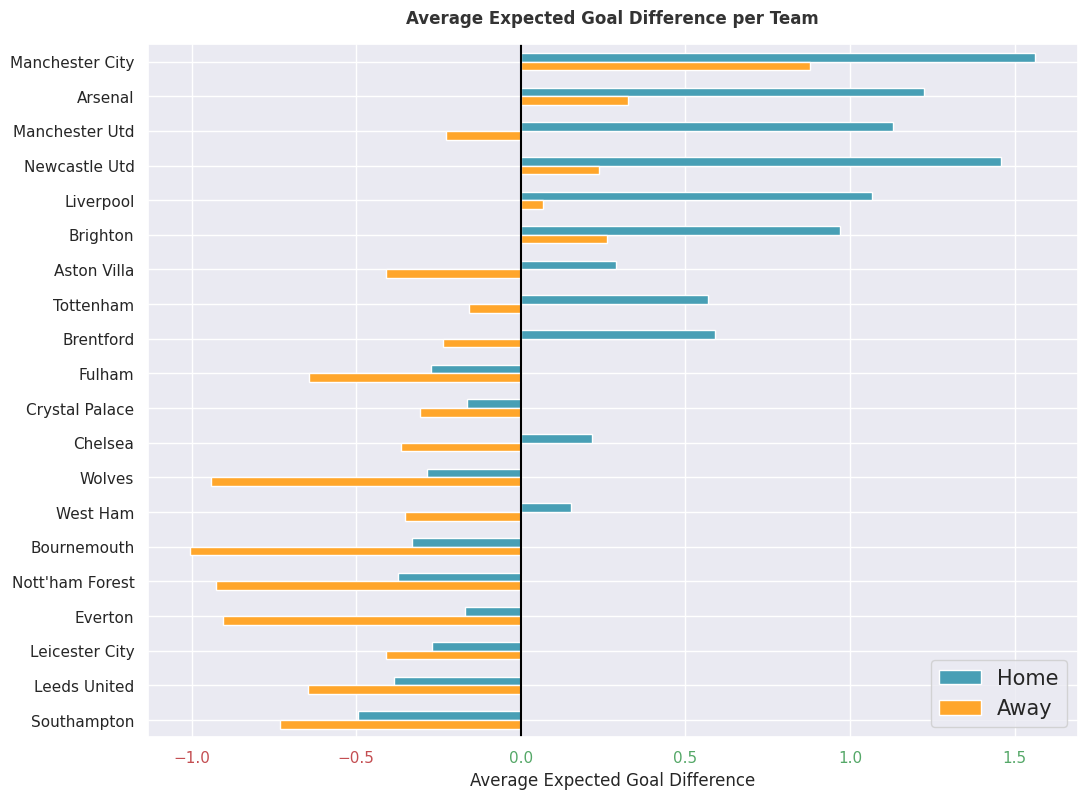

In [ ]:
# Create dataframe for home and away average expected goal difference for each team
xgd_by_home = pl_df.groupby("Home")["HomeXGD"].mean()
xgd_by_away = pl_df.groupby("Away")["AwayXGD"].mean()
xgd_by_team = pd.concat([xgd_by_home, xgd_by_away], axis = 1)

# Change index to team column
xgd_by_team.reset_index(inplace=True)
xgd_by_team = xgd_by_team.rename(columns = {"index": "Team"})

# Add team ranking column
xgd_by_team["Ranking"] = xgd_by_team["Team"].map(rankings)
xgd_by_team = xgd_by_team.sort_values(by = ["Ranking"])

# Bar plot of average expected goal difference of each team home and away
my_color = ["#489fb5", "#ffa62b"]
xgd_plot = xgd_by_team.plot(x = "Team", y = ["HomeXGD", "AwayXGD"], kind = 'barh', color = my_color, zorder = 1, figsize = (12, 9))
xgd_plot.set(ylabel = None)
xgd_plot.grid(True, axis='x', zorder = 0)
plt.gca().invert_yaxis()
plt.tick_params(left = False, bottom = False)
plt.xlabel("Average Expected Goal Difference")
plt.legend(labels = ["Home", "Away"], fontsize = 15, loc = "lower right")
plt.axvline(0, color = "black")
plt.title("Average Expected Goal Difference per Team", pad = 15, color = "#333333", weight = "bold")

colors = ['r', 'r', 'r', 'g', 'g', 'g', 'g']
for xtick, color in zip(xgd_plot.get_xticklabels(), colors):
    xtick.set_color(color)
plt.show()

### Stadium Attendance

In [ ]:
# Create dataframe for average goals scored, points won, GD and XGD against attendance
goals = pl_df.groupby("Home")["HomeGoals"].mean().round(2)
points = pl_df.groupby("Home")["HomePoints"].mean().round(2)
gd = pl_df.groupby("Home")["HomeGD"].mean().round(2)
xgd = pl_df.groupby("Home")["HomeXGD"].mean().round(2)
attendance = pl_df.groupby("Home")["Attendance"].mean().round(2)
performance_vs_attendance = pd.concat([goals, points, gd, xgd, attendance], axis = 1)
performance_vs_attendance

,HomeGoals,HomePoints,HomeGD,HomeXGD,Attendance
Home,,,,,
Arsenal,2.79,2.37,1.47,1.23,60190.84
Aston Villa,1.74,2.00,0.63,0.29,41706.89
Bournemouth,1.05,1.16,-0.42,-0.33,10362.47
Brentford,1.84,1.95,0.89,0.59,17077.58
Brighton,1.95,1.79,0.84,0.97,31476.89
Chelsea,1.05,1.32,0.05,0.22,40002.05
Crystal Palace,1.11,1.47,-0.11,-0.16,24951.53
Everton,0.84,1.11,-0.58,-0.17,39242.89
Fulham,1.63,1.53,0.11,-0.27,23746.16


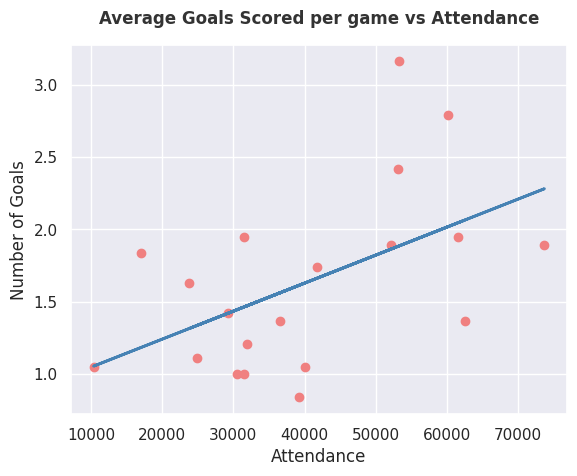

0.5188723539990009


In [ ]:
# Scatterplot of Average Goals Scored against Attendance
x = performance_vs_attendance["Attendance"]
y = performance_vs_attendance["HomeGoals"]
plt.scatter(x, y, color = "lightcoral")

# Plot best fit line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, color='steelblue', linewidth=2)
plt.xlabel("Attendance")
plt.ylabel("Number of Goals")
plt.title("Average Goals Scored per game vs Attendance", pad = 15, color = "#333333", weight = "bold")
plt.show()

# Correlation
print(performance_vs_attendance["Attendance"].corr(performance_vs_attendance["HomeGoals"]))

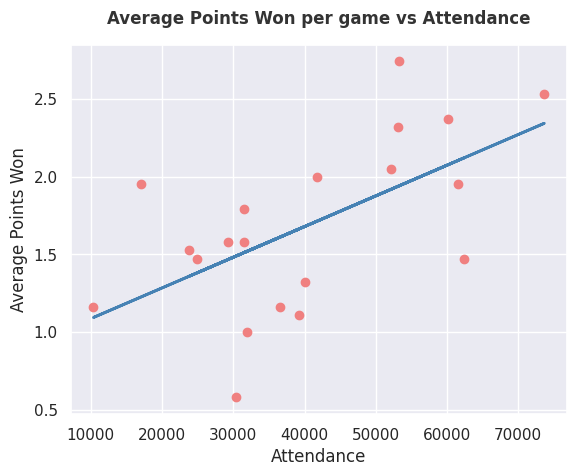

0.5916403239518614


In [ ]:
# Scatterplot of Average Points Won against Attendance
x = performance_vs_attendance["Attendance"]
y = performance_vs_attendance["HomePoints"]
plt.scatter(x, y, color = "lightcoral")

# Plot best fit line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, color='steelblue', linewidth=2)
plt.xlabel("Attendance")
plt.ylabel("Average Points Won")
plt.title("Average Points Won per game vs Attendance", pad = 15, color = "#333333", weight = "bold")
plt.show()

# Correlation
print(performance_vs_attendance["Attendance"].corr(performance_vs_attendance["HomePoints"]))

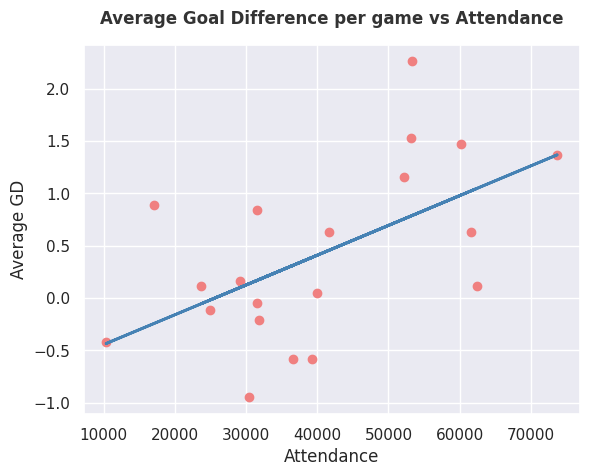

0.565158548989272


In [ ]:
# Scatterplot of Average GD against Attendance
x = performance_vs_attendance["Attendance"]
y = performance_vs_attendance["HomeGD"]
plt.scatter(x, y, color = "lightcoral")

# Plot best fit line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, color='steelblue', linewidth=2)
plt.xlabel("Attendance")
plt.ylabel("Average GD")
plt.title("Average Goal Difference per game vs Attendance", pad = 15, color = "#333333", weight = "bold")
plt.show()

# Correlation
print(performance_vs_attendance["Attendance"].corr(performance_vs_attendance["HomeGD"]))

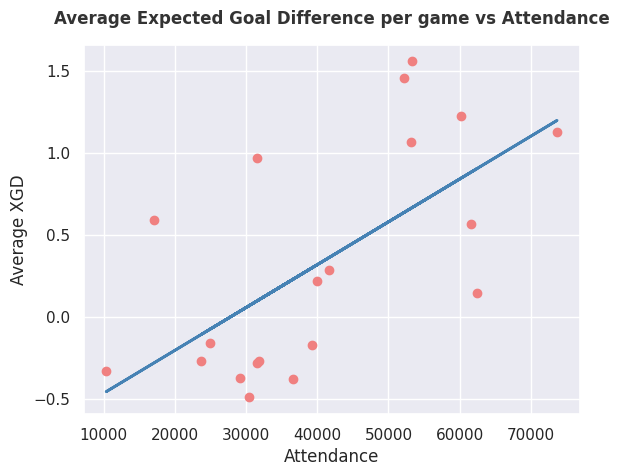

0.6347255711690879


In [ ]:
# Scatterplot of Average XGD against Attendance
x = performance_vs_attendance["Attendance"]
y = performance_vs_attendance["HomeXGD"]
plt.scatter(x, y, color = "lightcoral")

# Plot best fit line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, color='steelblue', linewidth=2)
plt.xlabel("Attendance")
plt.ylabel("Average XGD")
plt.title("Average Expected Goal Difference per game vs Attendance", pad = 15, color = "#333333", weight = "bold")
plt.show()

# Correlation
print(performance_vs_attendance["Attendance"].corr(performance_vs_attendance["HomeXGD"]))

# Analysis of Upsets (Lower-Ranked Team Wins/Draws against Higher-Ranked Team)

In [ ]:
# Create new column for the difference in rank between Home and Away teams
pl_df["RankGap"] = pl_df["HomeRanking"] - pl_df["AwayRanking"]

In [ ]:
# Home Upset Definition: underdog team that is at least ten ranks lower than opponent draws/wins at home

# Create dataframe for all home upsets
home_upset = pl_df[(pl_df["RankGap"] >= 10) & (pl_df["HomeGoals"] >= pl_df["AwayGoals"])]
home_upset["Home/Away"] = "Home"
home_upset["Results"] = np.where(home_upset["HomePoints"] == 1, "Home Draw", "Home Win")
home_upset.head()

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Attendance,Venue,HomeGoals,AwayGoals,HomePoints,AwayPoints,HomeGD,AwayGD,HomeXGD,AwayXGD,HomeRanking,AwayRanking,RankGap,Home/Away,Results
50,6.0,Sat,2022-09-03,12:30,Everton,1.7,0–0,2.1,Liverpool,39240,Goodison Park,0,0,1,1,0,0,-0.4,0.4,17,5,12,Home,Home Draw
75,9.0,Sun,2022-10-02,16:30,Leeds United,0.4,0–0,2.2,Aston Villa,36582,Elland Road,0,0,1,1,0,0,-1.8,1.8,19,7,12,Home,Home Draw
106,13.0,Sat,2022-10-22,12:30,Nott'ham Forest,1.9,1–0,1.6,Liverpool,29245,The City Ground,1,0,3,0,1,-1,0.3,-0.3,16,5,11,Home,Home Win
113,13.0,Sun,2022-10-23,14:00,Southampton,0.7,1–1,1.0,Arsenal,31145,St. Mary's Stadium,1,1,1,1,0,0,-0.3,0.3,20,2,18,Home,Home Draw
192,21.0,Sat,2023-01-21,15:00,Leicester City,0.9,2–2,1.7,Brighton,32056,King Power Stadium,2,2,1,1,0,0,-0.8,0.8,18,6,12,Home,Home Draw


In [ ]:
# Away Upset Definition: underdog team that is at least ten ranks lower than opponent draws/wins in opponent's stadium

# Create dataframe for all away upsets
away_upset = pl_df[(pl_df["RankGap"] <= -10) & (pl_df["AwayGoals"] >= pl_df["HomeGoals"])]
away_upset["Home/Away"] = "Away"
away_upset["Results"] = np.where(away_upset["AwayPoints"] == 1, "Away Draw", "Away Win")
away_upset.head()

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Attendance,Venue,HomeGoals,AwayGoals,HomePoints,AwayPoints,HomeGD,AwayGD,HomeXGD,AwayXGD,HomeRanking,AwayRanking,RankGap,Home/Away,Results
63,8.0,Sat,2022-09-17,15:00,Newcastle Utd,1.9,1–1,0.7,Bournemouth,52238,St James' Park,1,1,1,1,0,0,1.2,-1.2,4,15,-11,Away,Away Draw
97,12.0,Tue,2022-10-18,19:30,Brighton,1.7,0–0,0.1,Nott'ham Forest,31463,The American Express Community Stadium,0,0,1,1,0,0,1.6,-1.6,6,16,-10,Away,Away Draw
123,14.0,Sat,2022-10-29,19:45,Liverpool,1.7,1–2,1.8,Leeds United,53274,Anfield,1,2,0,3,-1,1,-0.1,0.1,5,19,-14,Away,Away Win
159,18.0,Sat,2022-12-31,15:00,Newcastle Utd,2.2,0–0,0.4,Leeds United,52211,St James' Park,0,0,1,1,0,0,1.8,-1.8,4,19,-15,Away,Away Draw
161,18.0,Sat,2022-12-31,15:00,Manchester City,1.7,1–1,0.1,Everton,53444,Etihad Stadium,1,1,1,1,0,0,1.6,-1.6,1,17,-16,Away,Away Draw


In [ ]:
# Merge both home and away upsets into one dataframe
upsets_df = pd.concat([home_upset, away_upset])
upsets_results_count = upsets_df["Results"].value_counts().rename_axis("Results").reset_index(name = "Counts")
upsets_results_count

,Results,Counts
0,Home Draw,12
1,Away Draw,9
2,Home Win,7
3,Away Win,3


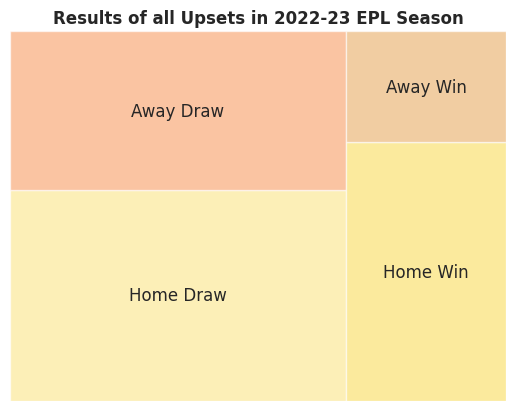

In [ ]:
# Create treemap of the results of all upsets
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65']
sns.set_style(style="whitegrid")
squarify.plot(sizes = upsets_results_count["Counts"], label = upsets_results_count["Results"], alpha=0.6,color=colors)
plt.title("Results of all Upsets in 2022-23 EPL Season", weight = "bold")
plt.axis('off')
plt.show()

In [ ]:
# Calculate XGD and GD of upsets
home_upset_perf = upsets_df[upsets_df["Home/Away"] == "Home"][["HomeXG", "HomeXGD", "Home/Away"]]
home_upset_perf = home_upset_perf.rename(columns={'HomeXG': 'XG', "HomeXGD": "XGD"})
away_upset_perf = upsets_df[upsets_df["Home/Away"] == "Away"][["AwayXG", "AwayXGD", "Home/Away"]]
away_upset_perf = away_upset_perf.rename(columns={'AwayXG': 'XG', "AwayXGD": "XGD"})
upset_perf_df = pd.concat([home_upset_perf, away_upset_perf])
upset_perf_df.head(5)

,XG,XGD,Home/Away
50,1.7,-0.4,Home
75,0.4,-1.8,Home
106,1.9,0.3,Home
113,0.7,-0.3,Home
192,0.9,-0.8,Home


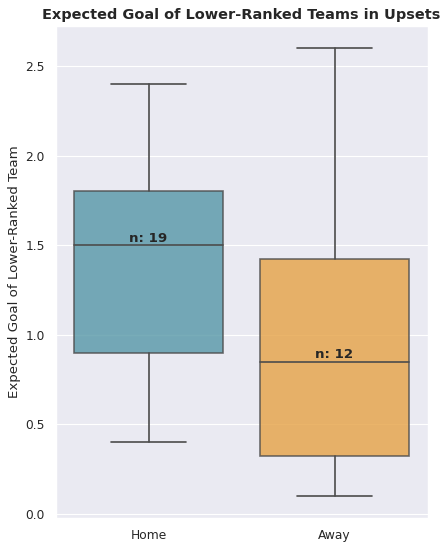

In [ ]:
# Boxplot of Expected Goal of Lower-Ranked Teams in Upsets
sns.set(style="darkgrid")
plt.figure(figsize=(6, 8), dpi= 80)

my_pal = {"Home": "#489fb5", "Away": "#ffa62b"}
ax = sns.boxplot(data = upset_perf_df, x = "Home/Away", y = "XG", palette = my_pal, boxprops = dict(alpha = 0.8))
ax.set(xlabel = None)
plt.ylabel("Expected Goal of Lower-Ranked Team")
plt.title("Expected Goal of Lower-Ranked Teams in Upsets", weight = "bold", fontsize = 13)

medians = upset_perf_df.groupby(['Home/Away'])['XG'].median().values
medians = np.flip(medians, 0)
nobs = upset_perf_df['Home/Away'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.02, nobs[tick], horizontalalignment='center', weight='semibold')
plt.show()

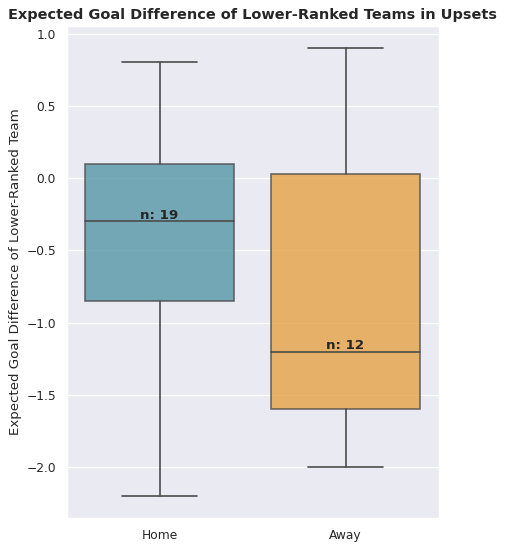

In [ ]:
# Boxplot of Expected Goal Difference of Lower-Ranked Teams in Upsets
sns.set(style="darkgrid")
plt.figure(figsize=(6, 8), dpi= 80)

my_pal = {"Home": "#489fb5", "Away": "#ffa62b"}
ax = sns.boxplot(data = upset_perf_df, x = "Home/Away", y = "XGD", palette = my_pal, boxprops = dict(alpha = 0.8))
ax.set(xlabel = None)
plt.ylabel("Expected Goal Difference of Lower-Ranked Team")
plt.title("Expected Goal Difference of Lower-Ranked Teams in Upsets", weight = "bold", fontsize = 13)

medians = upset_perf_df.groupby(['Home/Away'])['XGD'].median().values
medians = np.flip(medians, 0)
nobs = upset_perf_df['Home/Away'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.02, nobs[tick], horizontalalignment='center', weight='semibold')
plt.show()

# Covid vs Post-Covid Analysis

## 2020-21 Season

In [ ]:
# Retrieve data from webpage
df2 = pd.read_html('https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures')

In [ ]:
# Scrape all columns of dataset
for idx,table in enumerate(df2):
 print("***************************")
 print(idx)
 print(table)

original_df2 = df2[0]

***************************
0
       Wk  Day        Date   Time            Home   xG Score  xG.1  \
0     1.0  Sat  2020-09-12  12:30          Fulham  0.1   0–3   1.9   
1     1.0  Sat  2020-09-12  15:00  Crystal Palace  1.1   1–0   0.9   
2     1.0  Sat  2020-09-12  17:30       Liverpool  2.7   4–3   0.3   
3     1.0  Sat  2020-09-12  20:00        West Ham  1.0   0–2   1.6   
4     1.0  Sun  2020-09-13  14:00       West Brom  0.4   0–3   2.8   
..    ...  ...         ...    ...             ...  ...   ...   ...   
435  38.0  Sun  2021-05-23  16:00        West Ham  1.3   3–0   1.5   
436  38.0  Sun  2021-05-23  16:00    Leeds United  2.3   3–1   1.0   
437  38.0  Sun  2021-05-23  16:00         Arsenal  0.8   2–0   0.2   
438  38.0  Sun  2021-05-23  16:00       Liverpool  1.6   2–0   0.6   
439  38.0  Sun  2021-05-23  16:00          Fulham  1.0   0–2   1.3   

               Away  Attendance             Venue          Referee  \
0           Arsenal         NaN    Craven Cottage   Chris K

In [ ]:
original_df2.head(5)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2020-09-12,12:30,Fulham,0.1,0–3,1.9,Arsenal,NaN,Craven Cottage,Chris Kavanagh,Match Report,NaN
1,1.0,Sat,2020-09-12,15:00,Crystal Palace,1.1,1–0,0.9,Southampton,NaN,Selhurst Park,Jonathan Moss,Match Report,NaN
2,1.0,Sat,2020-09-12,17:30,Liverpool,2.7,4–3,0.3,Leeds United,NaN,Anfield,Michael Oliver,Match Report,NaN
3,1.0,Sat,2020-09-12,20:00,West Ham,1.0,0–2,1.6,Newcastle Utd,NaN,London Stadium,Stuart Attwell,Match Report,NaN
4,1.0,Sun,2020-09-13,14:00,West Brom,0.4,0–3,2.8,Leicester City,NaN,The Hawthorns,Anthony Taylor,Match Report,NaN


In [ ]:
# Remove unnecessary rows and columns, rename columns
covid_df = original_df2.drop(["Referee", "Match Report", "Notes"], axis = 1)
covid_df = covid_df.dropna(axis = 0, how = "all").reset_index(drop = True)
covid_df = covid_df.rename(columns={"xG": "HomeXG", "xG.1": "AwayXG"})
covid_df.head()

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Attendance,Venue
0,1.0,Sat,2020-09-12,12:30,Fulham,0.1,0–3,1.9,Arsenal,NaN,Craven Cottage
1,1.0,Sat,2020-09-12,15:00,Crystal Palace,1.1,1–0,0.9,Southampton,NaN,Selhurst Park
2,1.0,Sat,2020-09-12,17:30,Liverpool,2.7,4–3,0.3,Leeds United,NaN,Anfield
3,1.0,Sat,2020-09-12,20:00,West Ham,1.0,0–2,1.6,Newcastle Utd,NaN,London Stadium
4,1.0,Sun,2020-09-13,14:00,West Brom,0.4,0–3,2.8,Leicester City,NaN,The Hawthorns


In [ ]:
# Remove rows with attendance > 0
covid_df.drop(covid_df[covid_df["Attendance"].notnull()].index, inplace=True)
covid_df.shape

(348, 11)

In [ ]:
# Check number of missing values
covid_df.isnull().sum()

Wk              0
Day             0
Date            0
Time            0
Home            0
HomeXG          0
Score           0
AwayXG          0
Away            0
Attendance    348
Venue           0
dtype: int64

In [ ]:
# Remove attendance column
# covid_df.drop("Attendance", axis = 1, inplace = True)

In [ ]:
# Create new columns for goals scored by home and away teams
covid_df["HomeGoals"] = covid_df["Score"].str.split('–', expand = True)[0]
covid_df["HomeGoals"] = covid_df["HomeGoals"].astype(int)
covid_df["AwayGoals"] = covid_df["Score"].str.split('–', expand = True)[1]
covid_df["AwayGoals"] = covid_df["AwayGoals"].astype(int)

In [ ]:
# Create new columns for points scored for home and away teams
conditions = [
    (covid_df["HomeGoals"] > covid_df["AwayGoals"]),
    (covid_df["HomeGoals"] == covid_df["AwayGoals"]),
    (covid_df["HomeGoals"] < covid_df["AwayGoals"])
]

home_values = [3, 1, 0]
away_values = [0, 1, 3]

covid_df["HomePoints"] = np.select(conditions, home_values)
covid_df["AwayPoints"] = np.select(conditions, away_values)

In [ ]:
# Create new columns for goal difference for home and away teams
covid_df["HomeGD"] = covid_df["HomeGoals"] - covid_df["AwayGoals"]
covid_df["AwayGD"] = covid_df["AwayGoals"] - covid_df["HomeGoals"]

In [ ]:
# Create new columns for expected goal difference for home and away teams
covid_df["HomeXGD"] = covid_df["HomeXG"] - covid_df["AwayXG"]
covid_df["AwayXGD"] = covid_df["AwayXG"] - covid_df["HomeXG"]

In [ ]:
covid_df.head()

,Wk,Day,Date,Time,Home,HomeXG,Score,AwayXG,Away,Venue,HomeGoals,AwayGoals,HomePoints,AwayPoints,HomeGD,AwayGD,HomeXGD,AwayXGD
0,1.0,Sat,2020-09-12,12:30,Fulham,0.1,0–3,1.9,Arsenal,Craven Cottage,0,3,0,3,-3,3,-1.8,1.8
1,1.0,Sat,2020-09-12,15:00,Crystal Palace,1.1,1–0,0.9,Southampton,Selhurst Park,1,0,3,0,1,-1,0.2,-0.2
2,1.0,Sat,2020-09-12,17:30,Liverpool,2.7,4–3,0.3,Leeds United,Anfield,4,3,3,0,1,-1,2.4,-2.4
3,1.0,Sat,2020-09-12,20:00,West Ham,1.0,0–2,1.6,Newcastle Utd,London Stadium,0,2,0,3,-2,2,-0.6,0.6
4,1.0,Sun,2020-09-13,14:00,West Brom,0.4,0–3,2.8,Leicester City,The Hawthorns,0,3,0,3,-3,3,-2.4,2.4


In [ ]:
covid_stats = covid_df[["HomeGoals", "AwayGoals", "HomePoints", "HomeGD", "HomeXGD"]].mean().reset_index(name = "Covid")
noncovid_stats = pl_df[["HomeGoals", "AwayGoals", "HomePoints", "HomeGD", "HomeXGD"]].mean().reset_index(name = "Non-Covid")
radar_stats = pd.merge(covid_stats, noncovid_stats, "left")
radar_stats

,index,Covid,Non-Covid
0,HomeGoals,1.327586,1.634211
1,AwayGoals,1.356322,1.218421
2,HomePoints,1.321839,1.681579
3,HomeGD,-0.028736,0.415789
4,HomeXGD,0.094828,0.324474


In [ ]:
radar_stats.loc[:, "Covid"].values.flatten().tolist()

[1.3275862068965518,
 1.3563218390804597,
 1.3218390804597702,
 -0.028735632183908046,
 0.09482758620689655]

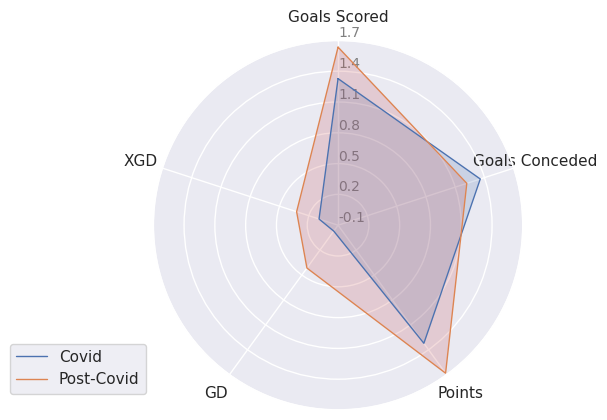

In [ ]:
# Number of variables
categories = ["Goals Scored", "Goals Conceded", "Points", "GD", "XGD"]
N = len(categories)

# Angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize spider plot
ax = plt.subplot(111, polar=True)

# Make first axis on top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw y labels
ax.set_rlabel_position(0)
plt.yticks([-0.1, 0.2, 0.5, 0.8, 1.1, 1.4, 1.7], ["-0.1", "0.2", "0.5", "0.8", "1.1", "1.4", "1.7"], color="grey", size = 10)
plt.ylim(-0.1, 1.7)

# Spider plot for Covid
values = radar_stats.loc[:, "Covid"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth = 1, linestyle = 'solid', label = "Covid")
ax.fill(angles, values, 'b', alpha = 0.2)

# Spider plot for Non-Covid
values = radar_stats.loc[:, "Non-Covid"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth = 1, linestyle = 'solid', label = "Post-Covid")
ax.fill(angles, values, 'r', alpha = 0.2)

plt.legend(loc = 'upper right', bbox_to_anchor = (0, 0.2))
plt.show()